In [1]:
%matplotlib inline

In [2]:
import pandas as pd

# Load the dream5 dataset
Please download the following datasets from the [dream5 dedicated website] (you need to create an account first)(https://www.synapse.org/#!Synapse:syn3130840):


+ `net3_expression_data.tsv`: E. coli gene expression data (MicroArray)
+ `net3_transcription_factors.tsv`: transcription factor genes

### Load the datasets
+ Load the gene expression dataset $X$

In [3]:
X = pd.read_csv("net3_expression_data.tsv",sep="\t")# rows represent genes and columns represent conditions

+ Load the Transcription Factors list

In [4]:
tf = pd.read_csv("net3_transcription_factors.tsv",header=None)[0]

# Preprocessing

Apply a simple z-score gene-wise (axis=0)

In [5]:
from grenadine.Preprocessing.standard_preprocessing import z_score

In [6]:
X = z_score(X,axis=0)

# Infer the GRN
+ Load the score links function and GENIE3 method

In [7]:
from grenadine.Inference.inference import score_links
from grenadine.Inference.regression_predictors import GENIE3

+ Choose the parameters of the underlying Random Forest of the GENIE3 method 

(the parameters are the same as those of [sklearn RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html))

In [19]:
GENIE3_params = {"n_estimators":30,
                 'max_depth':3}

+ Score all the possible edges between Transcription Factors and Target Genes

In [ ]:
score_matrix = score_links(X, GENIE3, tf, **GENIE3_params)

1409it [21:04,  1.19it/s]

# Visualize the results

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

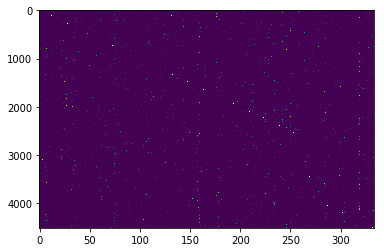

In [14]:
plt.imshow(score_matrix,aspect="auto")

# Rank the links according to their scores

In [ ]:
from grenadine.Inference.inference import rank_GRN
ranking = rank_GRN(score_matrix)

In [18]:
ranking.head(20)

,rank,score,TF,TG
G259_G3162,1.0,1.0,G259,G3162
G306_G77,1.0,1.0,G306,G77
G216_G299,1.0,1.0,G216,G299
G284_G332,1.0,1.0,G284,G332
G77_G306,1.0,1.0,G77,G306
G194_G329,1.0,1.0,G194,G329
G299_G216,1.0,1.0,G299,G216
G116_G2990,1.0,1.0,G116,G2990
G329_G2327,1.0,1.0,G329,G2327
G139_G2155,1.0,1.0,G139,G2155


# Evalute the Results
+ Download `DREAM5_NetworkInference_GoldStandard_Network3 - E. coli.tsv` the gold standard dataset from the [dream5 website](https://www.synapse.org/#!Synapse:syn2787213)
+ Load the gold standard

In [ ]:
grn = pd.read_csv("DREAM5_NetworkInference_GoldStandard_Network3 - E. coli.tsv",sep="\t",header=None)
# Rename the columns and the index
grn.columns = ["TF","TG","IS_REGULATED"]
grn.index = grn["TF"]+"_"+grn["TG"]
# Drop duplicate rows
grn = grn.drop_duplicates()

+ Load the `evaluate_result` function 

In [ ]:
from grenadine.Evaluation.evaluation import evaluate_result

In [ ]:
metrics = evaluate_result(score_matrix, grn, n_links=100000)

In [ ]:
metrics